## Links
[Kaggle](https://www.kaggle.com/c/inaturalist-2021/data)
[GitHub](https://github.com/visipedia/inat_comp/tree/master/2021)



## Details
There is a total of 10,000 species in the dataset. The full training dataset contains nearly 2.7M images. To make the dataset more accessible we have also created a "mini" training dataset with 50 examples per species for a total of 500K images. Each species has 10 validation images. There are a total of 500,000 test images. 

| Super Category | Species Count | Train Images | Train Mini Images | Val Images | Test Images |
| ---- | ---- | ---- | ---- | ---- | ---- |
Plants|4,271|1,148,702|213,550|42,710|x|
Insects|2,526|663,682|126,300|25,260|x|
Birds|1,486|414,847|74,300|14,860|x|
Fungi|341|90,048|17,050|3,410|x|
Reptiles|313|86,830|15,650|3,130|x|
Mammals|246|68,917|12,300|2,460|x|
Ray-finned Fishes|183|45,166|9,150|1,830|x|
Amphibians|170|46,252|8,500|1,700|x|
Mollusks|169|44,670|8,450|1,690|x|
Arachnids|153|40,687|7,650|1,530|x|
Animalia|142|37,042|7,100|1,420|x|
||||||
Total|10,000|2,686,843|500,000|100,000|500,000|

![Train Val Distribution](assets/train_val_distribution.png)

In [1]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm 

In [2]:
dir = '/groups/jjrodrig/projects/datasets/taxonomy_aim1_1/naturalist_2021'
!ls $dir 

public_test.json    README.md	train_mini.json    val	     zip-files
public_test.tar.gz  train_mini	train_mini.tar.gz  val.json


In [3]:
MODE = 'train'

if MODE == 'valid':   json_name = 'val.json'
elif MODE == 'train': json_name = 'train_mini.json'
elif MODE == 'test':  json_name = 'public_test.json'

with open(f'{dir}/{json_name}') as f:
    label_json = json.load(f)

In [139]:
# pd.DataFrame(label_json['licenses']).set_index('id')
# pd.DataFrame(label_json['info'], index=['']).T

In [15]:
print('keys', list(label_json.keys()))

df_images      = pd.DataFrame(label_json['images']).set_index('id')
df_categories  = pd.DataFrame(label_json['categories']).set_index('id')
df_annotations = pd.DataFrame(label_json['annotations']).set_index('id')

keys ['info', 'images', 'categories', 'annotations', 'licenses']


In [19]:
data = df_images.join(df_annotations)
data = data.join(df_categories, on='category_id')

data.head(3)

,width,height,file_name,license,rights_holder,date,latitude,longitude,location_uncertainty,image_id,...,common_name,supercategory,kingdom,phylum,class,order,family,genus,specific_epithet,image_dir_name
id,,,,,,,,,,,,,,,,,,,,,
0,500,500,train_mini/02912_Animalia_Chordata_Actinoptery...,0,Ken-ichi Ueda,2010-07-14 20:19:00+00:00,43.83486,-71.22231,77.0,0,...,Brown Bullhead Catfish,Ray-finned Fishes,Animalia,Chordata,Actinopterygii,Siluriformes,Ictaluridae,Ameiurus,nebulosus,02912_Animalia_Chordata_Actinopterygii_Silurif...
7,500,333,train_mini/05804_Plantae_Tracheophyta_Liliopsi...,0,Ken-ichi Ueda,2011-06-10 22:08:00+00:00,41.41572,-72.57861,27785.0,7,...,Green Arrow Arum,Plants,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Peltandra,virginica,05804_Plantae_Tracheophyta_Liliopsida_Alismata...
8,500,375,train_mini/00980_Animalia_Arthropoda_Insecta_L...,1,105615097470186309865,2011-06-25 00:00:00+00:00,39.79407,-120.37576,NaN,8,...,Ranchman's Tiger Moth,Insects,Animalia,Arthropoda,Insecta,Lepidoptera,Erebidae,Arctia,virginalis,00980_Animalia_Arthropoda_Insecta_Lepidoptera_...


# Extracting a subdataset for a specific supercategory

In [96]:
def extract_supercategory(dataframe=[], supercategory = 'Animalia'):

    dataframe2 = dataframe[dataframe.supercategory == supercategory].copy()

    class Categories():
        def __init__(self, data):
            self.l6_phylum   = data['phylum'].unique()
            self.l5_class    = data['class'].unique()
            self.l4_order    = data['order'].unique()
            self.l3_family   = data['family'].unique()
            self.l2_genus    = data['genus'].unique()
            self.l1_species  = data['specific_epithet'].unique()

    return dataframe2, Categories(data=dataframe2)

data_animalia, categories = extract_supercategory(dataframe=data, supercategory = 'Animalia')

# Visualizing the tree

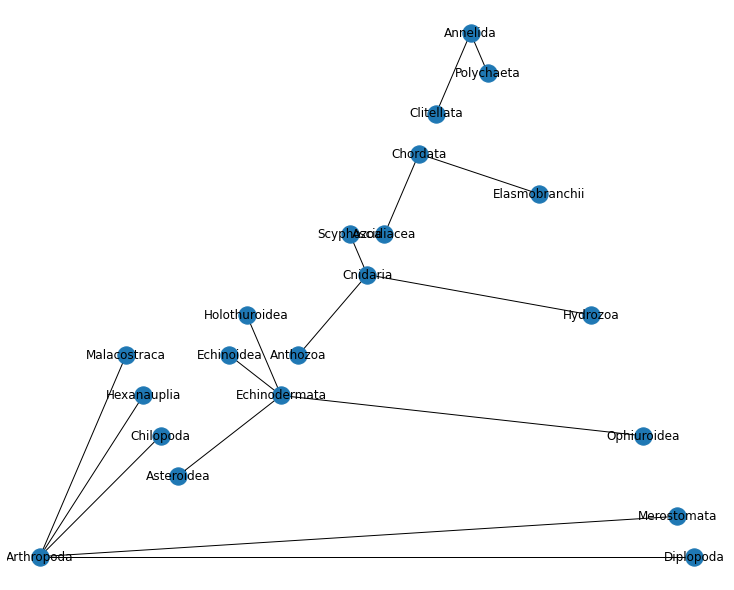

In [137]:
import seaborn as sn 
import matplotlib.pyplot as plt 
import graphviz # Digraph 
from scipy.cluster import hierarchy as hc 
import networkx  
import taxonomy

df = data_animalia[['phylum','class','order']] 
a = networkx.convert_matrix.from_pandas_edgelist(df, source='phylum', target='class')

plt.figure(figsize=(10,8))
networkx.draw_planar(a,with_labels=True)

 

In [140]:
# taxonomy.Taxonomy.from_newick(df.values)
# df.to_json('tax.json')
# taxonomy.Taxonomy.from_json('tax.json')


In [ ]:
()